# Objective


1. **Analyze Salary Trends in Data Science Roles**:
   - Understand how salaries for data science-related jobs have changed over the years (2020–2024).
   - Identify growth patterns, stagnation, or decline in the data science job market.

2. **Identify Key Factors Influencing Salaries**:
   - Examine how factors like job roles, locations, or experience levels affect salary distributions.
   - Highlight top-paying roles, industries.

3. **Provide Actionable Insights**:
   - Assist job seekers, employers, or educators in understanding the evolving field of data science.

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('DataScience_salaries_2024.csv')
data.head()

work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0               CL            L  
1               US            L  
2               HU            L  
3               JP            S  
4               IN            L

## Data Preprocessing

In [3]:
data.shape

(14838, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [6]:
data.describe()

work_year        salary  salary_in_usd  remote_ratio
count  14838.000000  1.483800e+04   14838.000000  14838.000000
mean    2023.138900  1.650227e+05  149874.718763     32.760480
std        0.700799  3.562354e+05   69009.181349     46.488278
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.021000e+05  102000.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.875000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000

In [7]:
data = data.drop(columns=['salary', 'salary_currency'])

In [8]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
data.duplicated().sum()

5711

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(9127, 9)

In [13]:
data.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              153
salary_in_usd         2730
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [14]:
numeric_columns = data[['work_year','salary_in_usd', 'remote_ratio']]
categorical_columns = data[['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']]

In [15]:
for col in categorical_columns:
    print(data[col].value_counts())

experience_level
SE    5414
MI    2466
EN     893
EX     354
Name: count, dtype: int64
employment_type
FT    9061
PT      27
CT      26
FL      13
Name: count, dtype: int64
job_title
Data Engineer                      1709
Data Scientist                     1684
Data Analyst                       1245
Machine Learning Engineer           867
Analytics Engineer                  333
                                   ... 
Staff Machine Learning Engineer       1
Deep Learning Researcher              1
Big Data Developer                    1
Consultant Data Engineer              1
CRM Data Analyst                      1
Name: count, Length: 153, dtype: int64
employee_residence
US    7471
GB     507
CA     349
DE      90
IN      74
      ... 
MU       1
BG       1
IR       1
DZ       1
ID       1
Name: count, Length: 88, dtype: int64
company_location
US    7520
GB     515
CA     351
DE      97
ES      70
      ... 
IR       1
MU       1
QA       1
HK       1
EC       1
Name: count, Length: 7

In [16]:
for col in numeric_columns:
    print(data[col].value_counts())

work_year
2023    4632
2024    3091
2022    1113
2021     216
2020      75
Name: count, dtype: int64
salary_in_usd
150000    137
100000    134
120000    116
130000     98
140000     96
         ... 
151300      1
151700      1
151840      1
152022      1
15966       1
Name: count, Length: 2730, dtype: int64
remote_ratio
0      5690
100    3191
50      246
Name: count, dtype: int64


## Exploratory Data Analysis

In [17]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

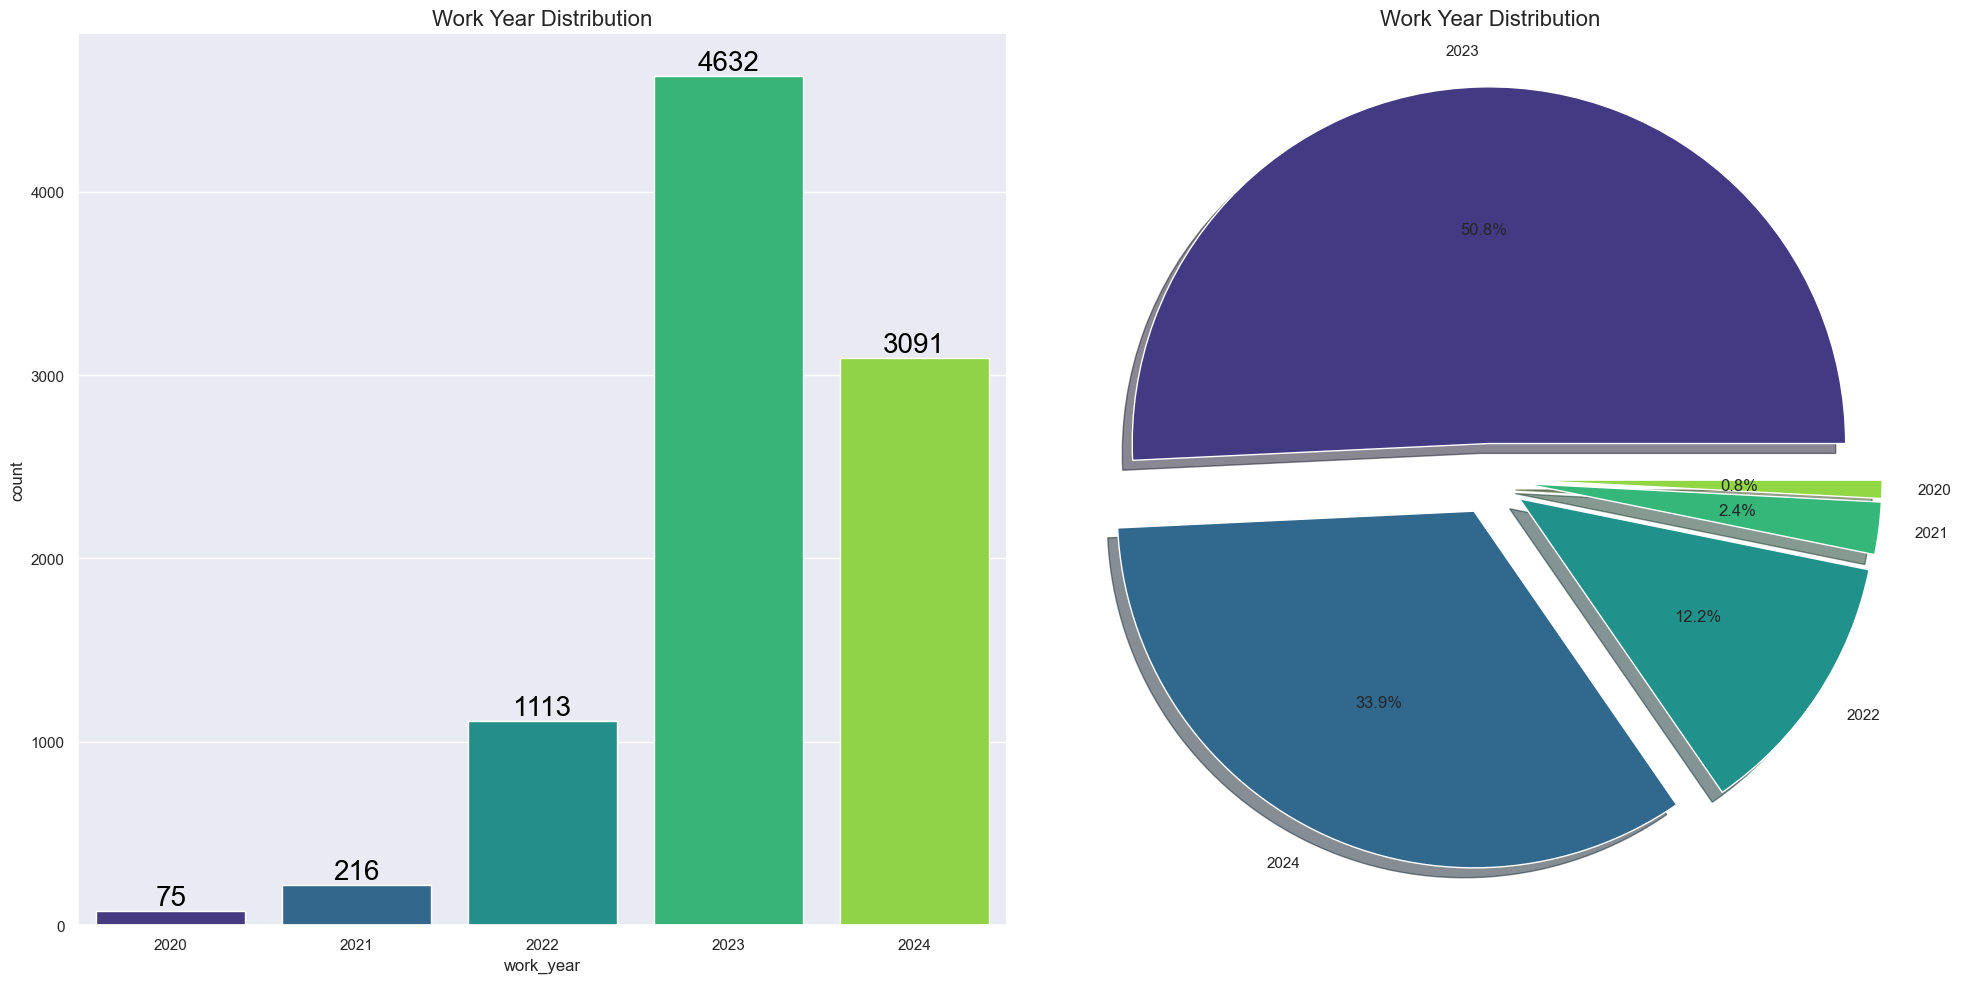

In [18]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

custom_palette = sns.color_palette("viridis", n_colors=len(data['work_year'].unique()))

sns.countplot(x='work_year', data=data, palette=custom_palette, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Work Year Distribution', fontsize=16)

ax[1].pie(x=data['work_year'].value_counts(), labels=data['work_year'].value_counts().index, 
          explode=[0.1] * len(data['work_year'].value_counts()), autopct='%1.1f%%', 
          shadow=True, colors=custom_palette)
ax[1].set_title('Work Year Distribution', fontsize=16)

plt.tight_layout()
plt.show()

* The data reflects a significant growth in data science job opportunities from 2020 to 2023, peaking in 2023, which accounted for over half of the total job data. While 2024 shows a decline, this may indicate either incomplete data or market stabilization after rapid growth. The consistent upward trend until 2023 highlights the increasing demand for data professionals, making this period pivotal for both job seekers and employers in the data science domain.

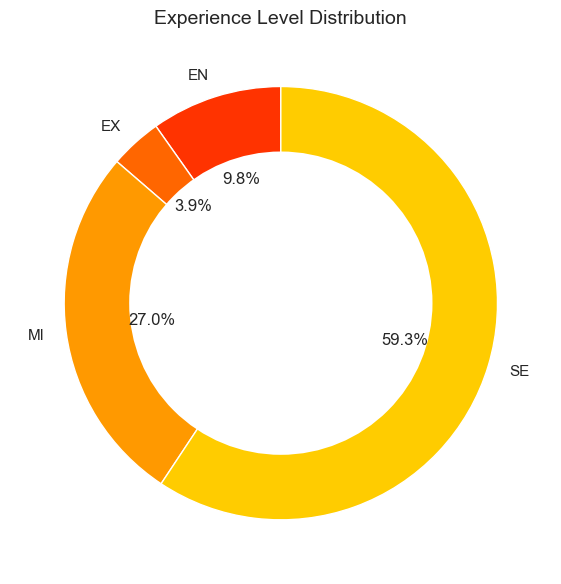

In [19]:
experience_counts = data['experience_level'].value_counts().sort_index().reset_index()
experience_counts.columns = ['Experience Level', 'Frequency']
plt.figure(figsize=(8, 6))
plt.pie(experience_counts['Frequency'], labels=experience_counts['Experience Level'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('autumn', n_colors=len(experience_counts)))

centre_circle = plt.Circle((0,0), 0.70, color='white', lw=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Experience Level Distribution', fontsize=14)
plt.tight_layout()
plt.show()

* The chart highlights that senior-level (SE) roles dominate the data science field (59.3%), indicating high demand for experienced professionals. Mid-level (27%) also holds a significant share, while entry-level (9.8%) and executive roles (3.9%) are limited. This suggests that advancing skills and experience is key for career growth and accessing higher-paying opportunities in the field.

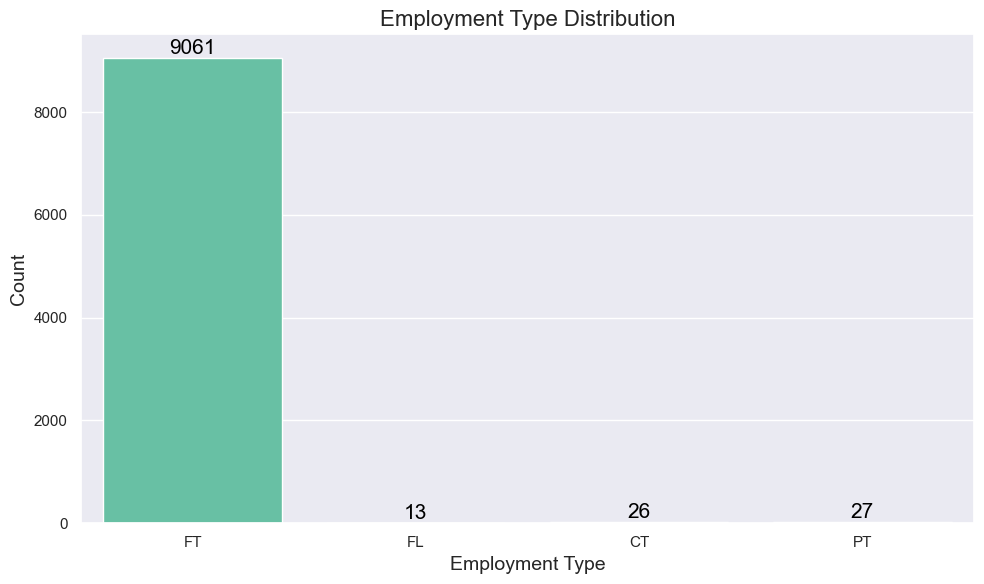

In [20]:
plt.figure(figsize=(10, 6))

custom_palette = sns.color_palette("Set2", n_colors=len(data['employment_type'].unique()))

sns.countplot(x='employment_type', data=data, palette=custom_palette, saturation=0.95)
for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15)

plt.title('Employment Type Distribution', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

* It shows that full-time (FT) roles overwhelmingly dominate with 9,061 positions, while freelance (FL), contract (CT), and part-time (PT) roles collectively make up a minimal share (13, 26, and 27 respectively). This highlights that the data science job market is primarily geared towards full-time employment, with limited opportunities for alternative work arrangements.

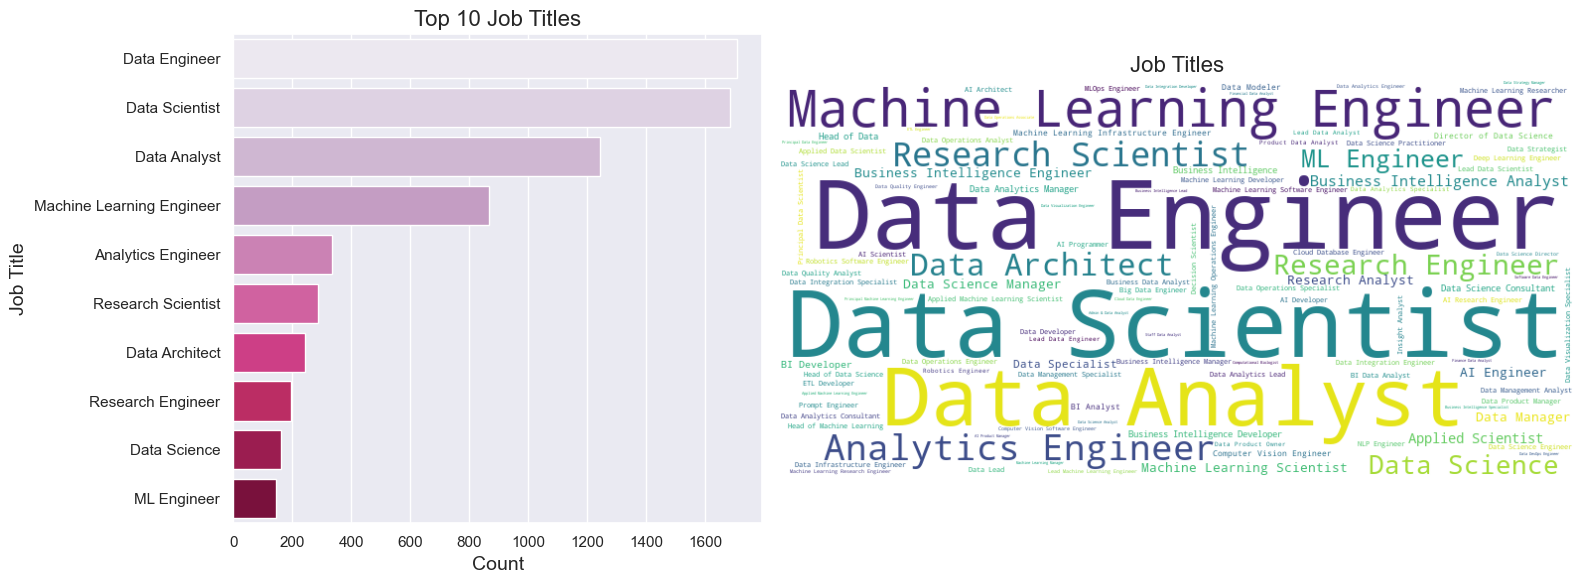

In [21]:
top_n = 10
top_job_titles = data['job_title'].value_counts().head(top_n)

job_title_freq = data['job_title'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(job_title_freq)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.5]})

sns.barplot(ax=axes[0], x=top_job_titles.values, y=top_job_titles.index, palette='PuRd')
axes[0].set_title(f'Top {top_n} Job Titles', fontsize=16)
axes[0].set_xlabel('Count', fontsize=14)
axes[0].set_ylabel('Job Title', fontsize=14)

axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Job Titles', fontsize=16)

plt.tight_layout()
plt.show()

* The data engineering, data science, and data analysis roles dominate the job market, with machine learning engineering gaining traction. These findings reflect a strong demand for technical expertise, suggesting aspiring professionals focus on these areas to maximize career opportunities.

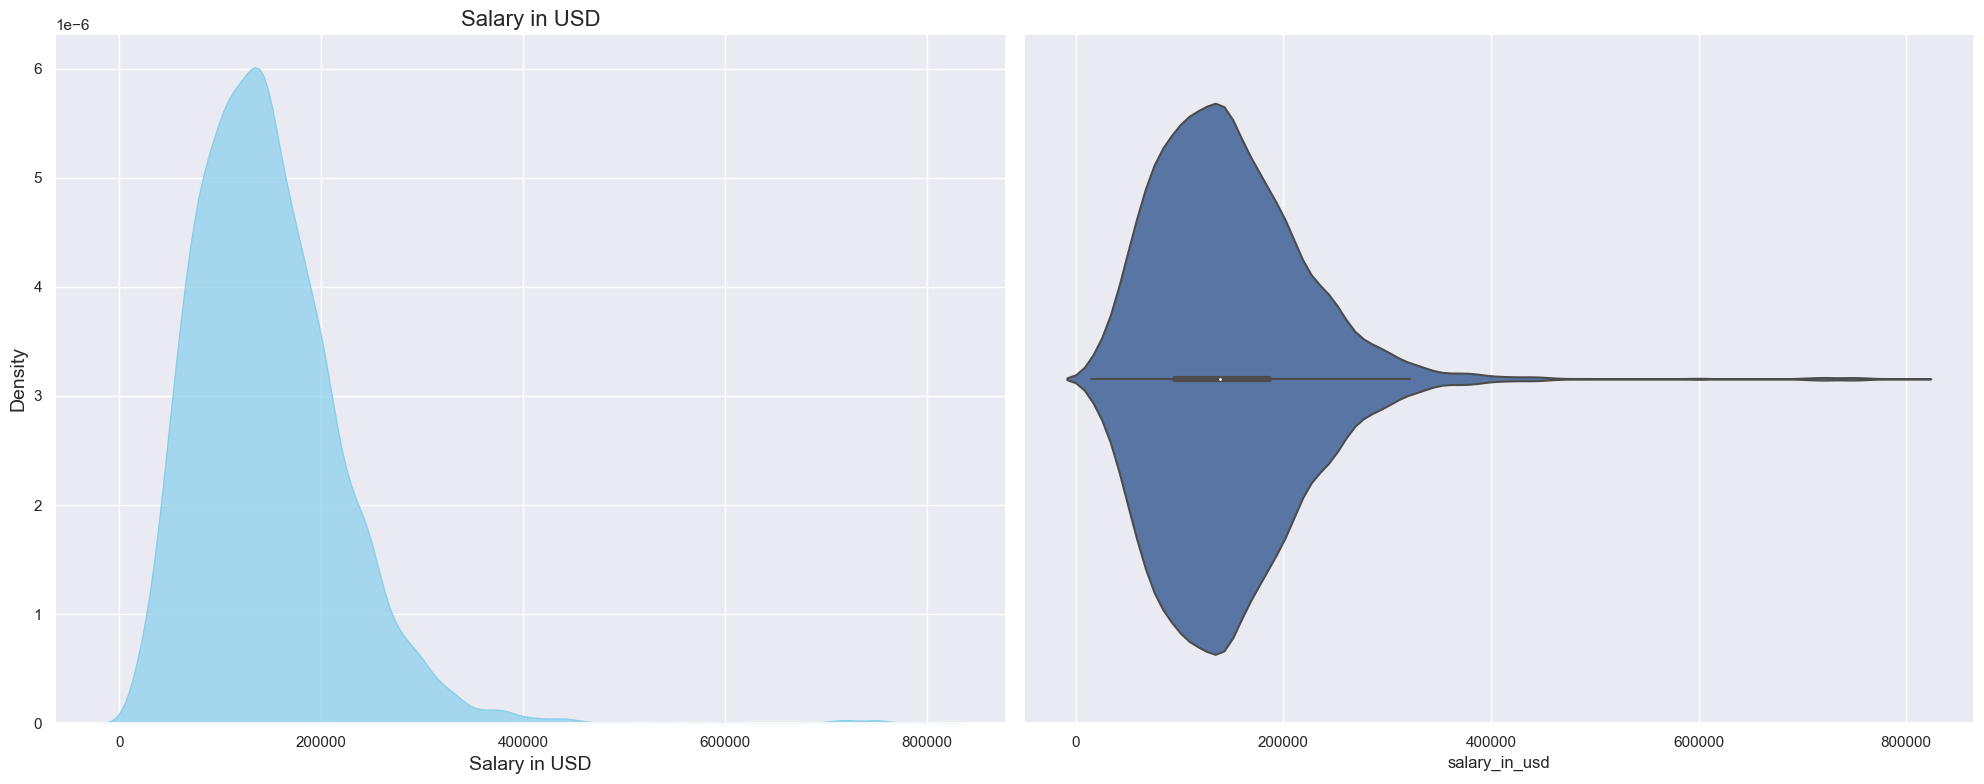

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(data['salary_in_usd'], shade=True, color='skyblue', alpha=0.7, ax=ax[0])

ax[0].set_title('Salary in USD', fontsize=16)
ax[0].set_xlabel('Salary in USD', fontsize=14)
ax[0].set_ylabel('Density', fontsize=14)

sns.violinplot(x=data['salary_in_usd'], ax=ax[1])

plt.tight_layout()
plt.show()

* The salary distribution in data science shows most roles earning under 200,000 USD, with a few outliers reaching up to 800,000 USD. High variance suggests salaries are influenced by factors like role, location, and experience. Job seekers should target high-demand skills, while employers should offer competitive salaries to attract talent.

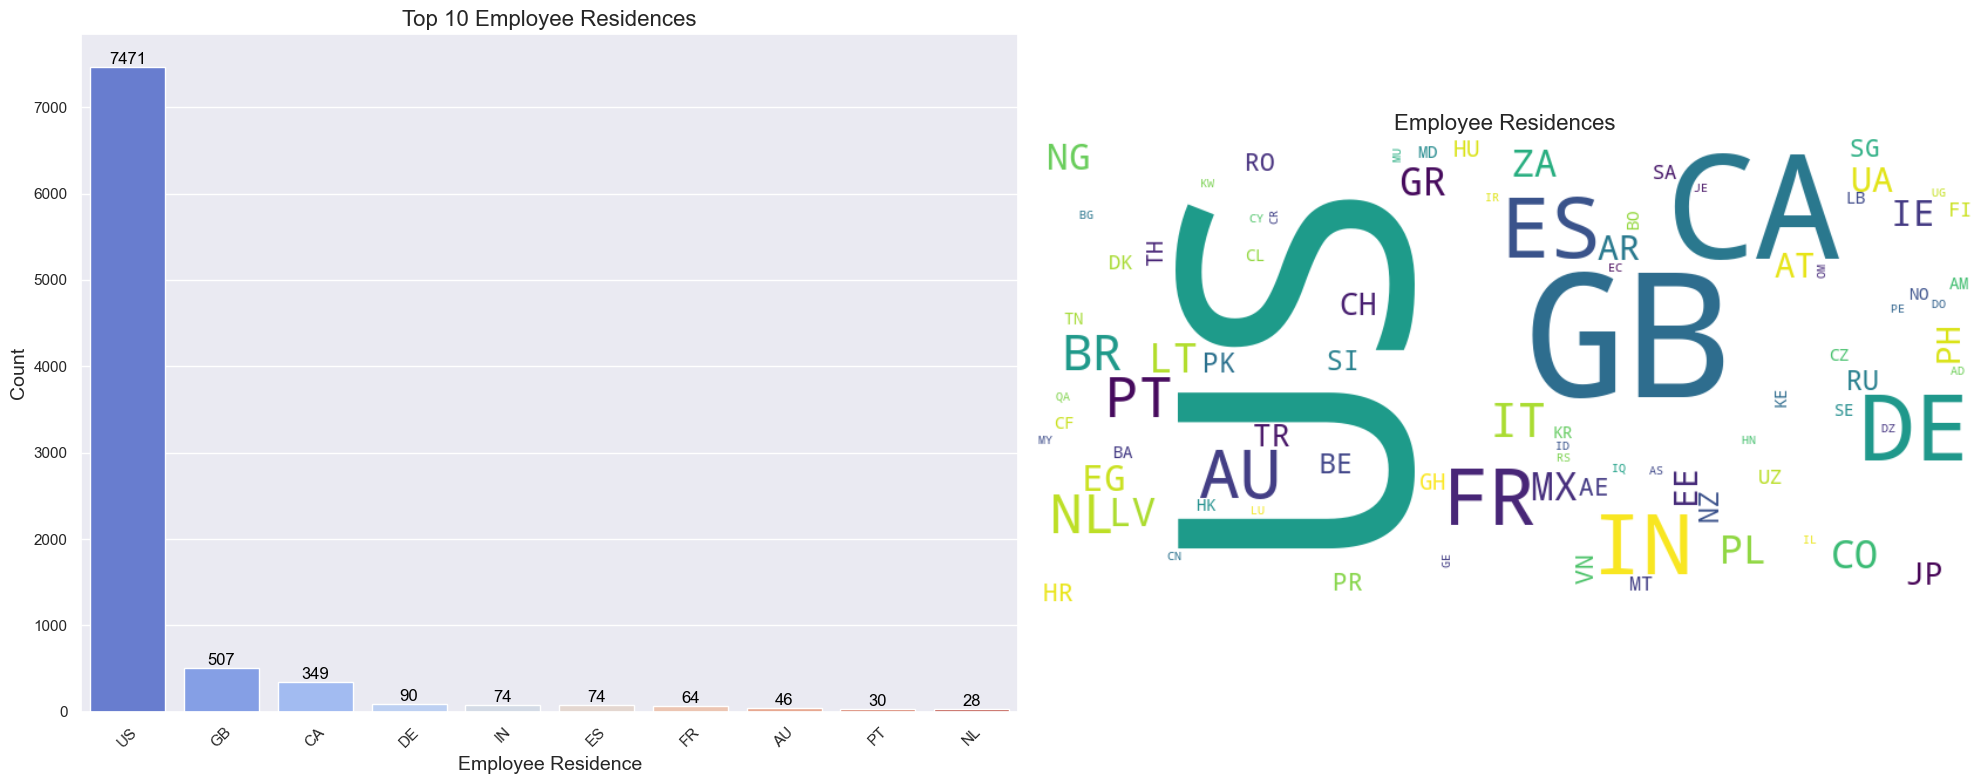

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

top_n = 10
top_residences = data['employee_residence'].value_counts().head(top_n)

sns.barplot(x=top_residences.index, y=top_residences.values, palette='coolwarm', ax=ax[0])

for index, value in enumerate(top_residences.values):
    ax[0].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12, color='black')

ax[0].set_title(f'Top {top_n} Employee Residences', fontsize=16)
ax[0].set_xlabel('Employee Residence', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

ax[0].tick_params(axis='x', rotation=45)

residence_freq = data['employee_residence'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(residence_freq)

ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis('off') 
ax[1].set_title('Employee Residences', fontsize=16)

plt.tight_layout()
plt.show()

* The <b>US</b> dominates data science employment, followed by the <b>Great Britain</b> and <b>Canada</b>, with other countries contributing significantly less. This highlights the US as the leading hub for data science opportunities.

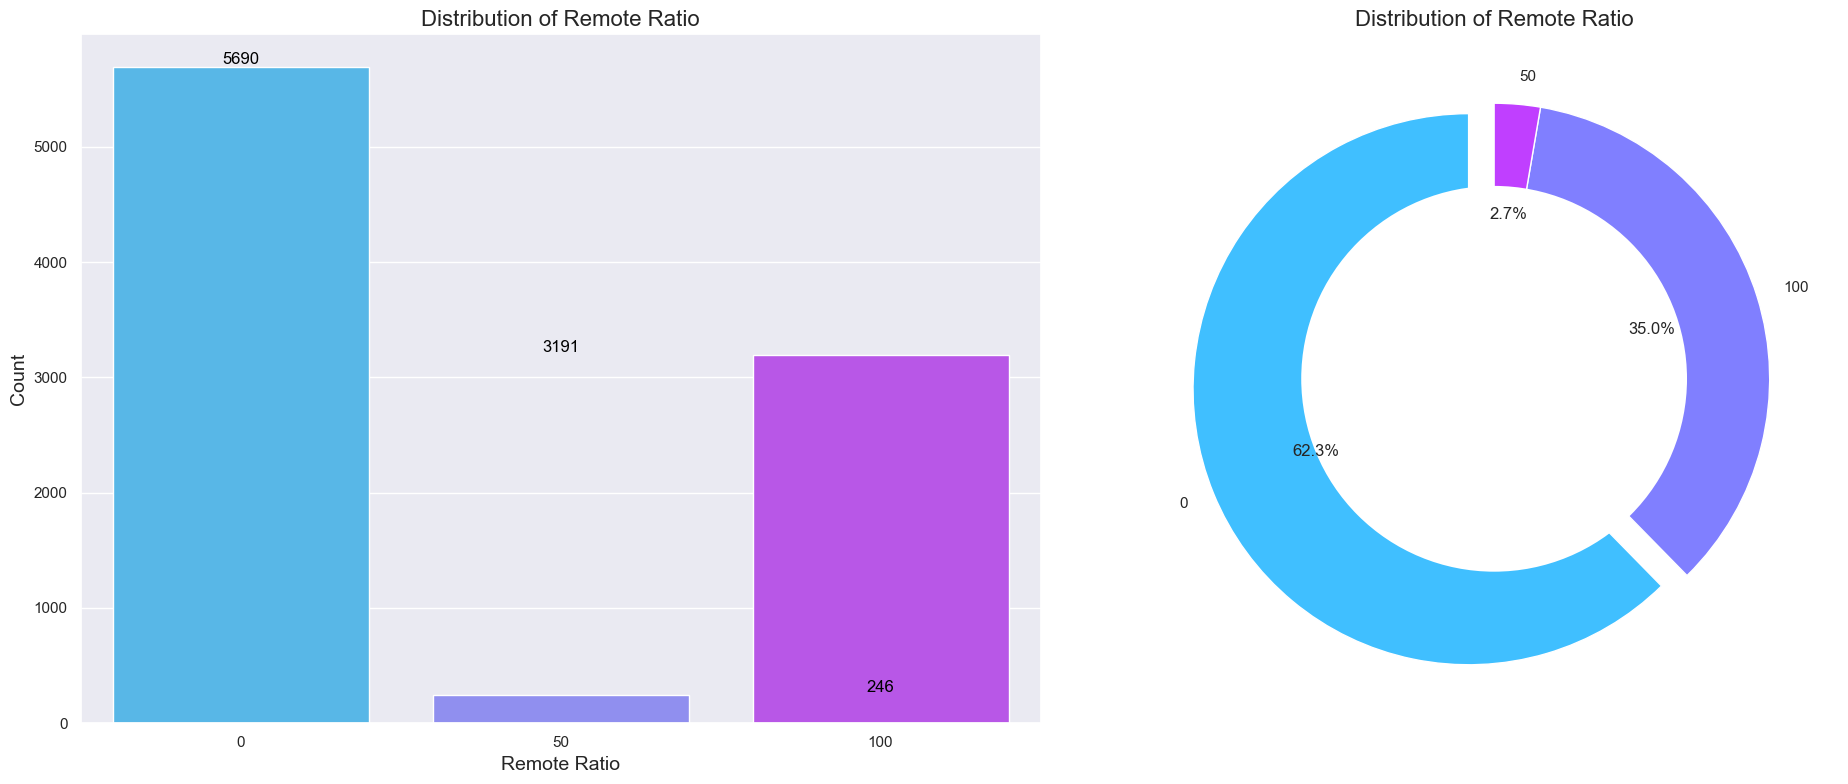

In [24]:
remote_ratio_counts = data['remote_ratio'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_counts.values, palette='cool', ax=ax[0])

for index, value in enumerate(remote_ratio_counts.values):
    ax[0].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12, color='black')

ax[0].set_title('Distribution of Remote Ratio', fontsize=16)
ax[0].set_xlabel('Remote Ratio', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

explode = [0.1, 0, 0]  
ax[1].pie(remote_ratio_counts, labels=remote_ratio_counts.index, autopct='%1.1f%%', 
          startangle=90, explode=explode, colors=sns.color_palette('cool', n_colors=3))

centre_circle = plt.Circle((0, 0), 0.70, color='white', lw=0)
fig.gca().add_artist(centre_circle)

ax[1].set_title('Distribution of Remote Ratio', fontsize=16)

plt.tight_layout()
plt.show()


* The majority of data science roles (62.3%) are fully on-site, while 35% offer fully remote options, and only 2.7% have a hybrid remote ratio. This highlights a strong preference for on-site roles, though remote work is a significant trend in the industry.

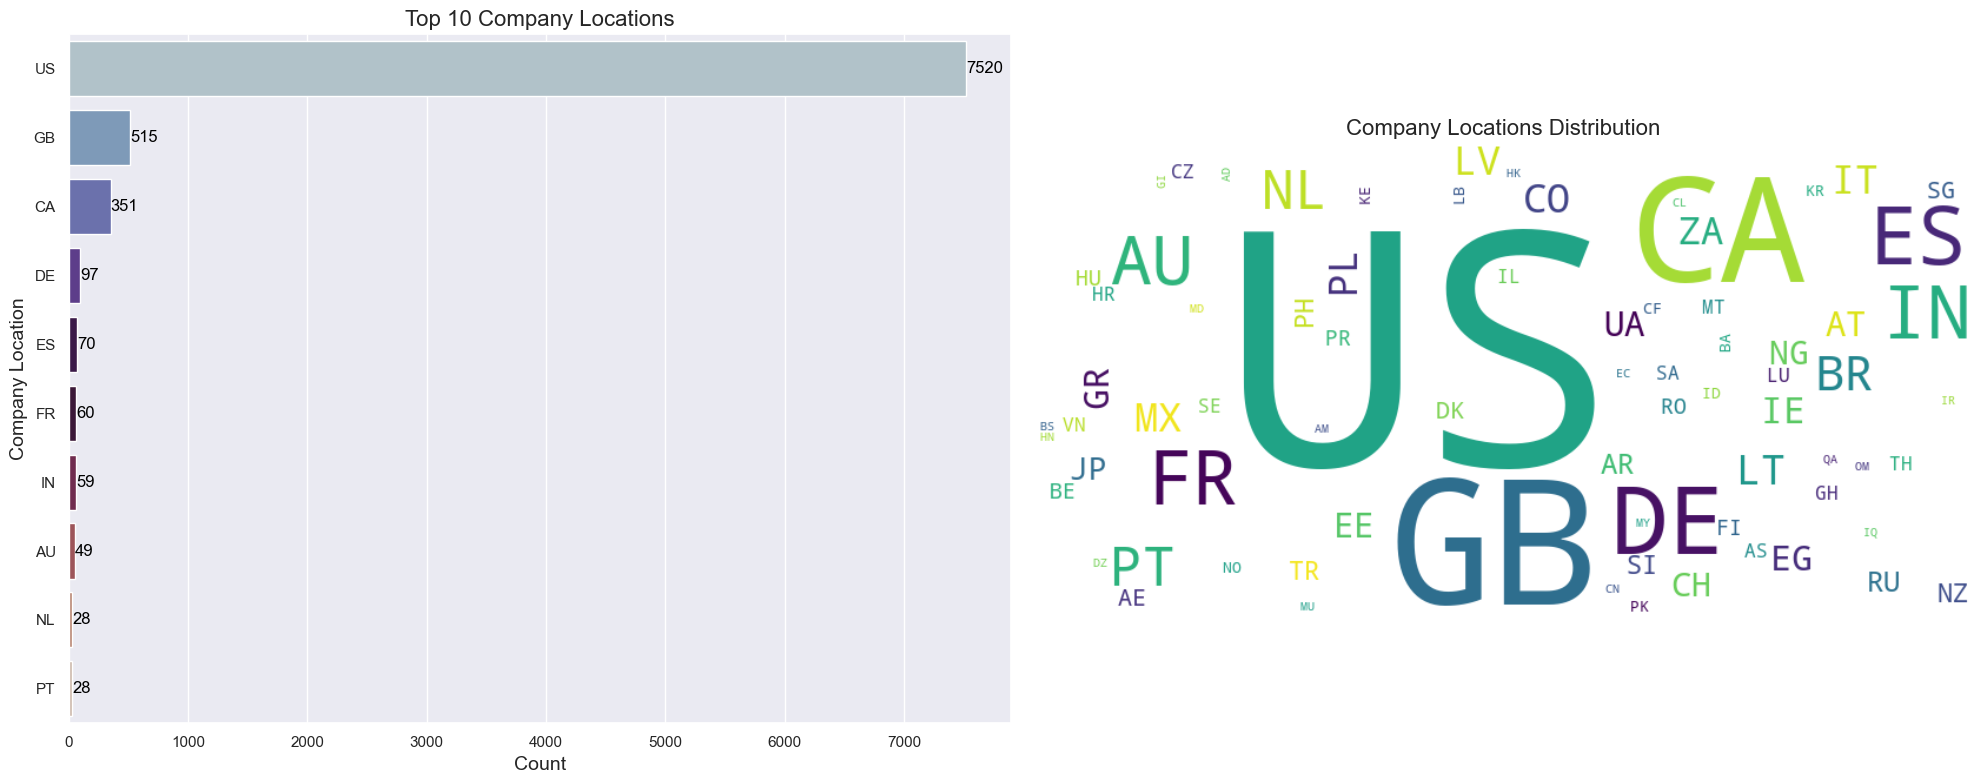

In [25]:
top_n = 10
top_locations = data['company_location'].value_counts().head(top_n)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x=top_locations.values, y=top_locations.index, palette='twilight', ax=ax[0])

for index, value in enumerate(top_locations.values):
    ax[0].text(value + 0.1, index, str(value), va='center', fontsize=12, color='black')

ax[0].set_title(f'Top {top_n} Company Locations', fontsize=16)
ax[0].set_xlabel('Count', fontsize=14)
ax[0].set_ylabel('Company Location', fontsize=14)

location_freq = data['company_location'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(location_freq)

ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis('off')  
ax[1].set_title('Company Locations Distribution', fontsize=16)

plt.tight_layout()
plt.show()

* The analysis reveals that the United States dominates the data science job market, followed by the UK and Canada. Location significantly influences salary trends, with top-paying roles concentrated in high-demand regions like the US. Job seekers should prioritize these locations, while employers must offer competitive salaries to attract talent. Educators should focus on equipping graduates with skills aligned to regional demands.

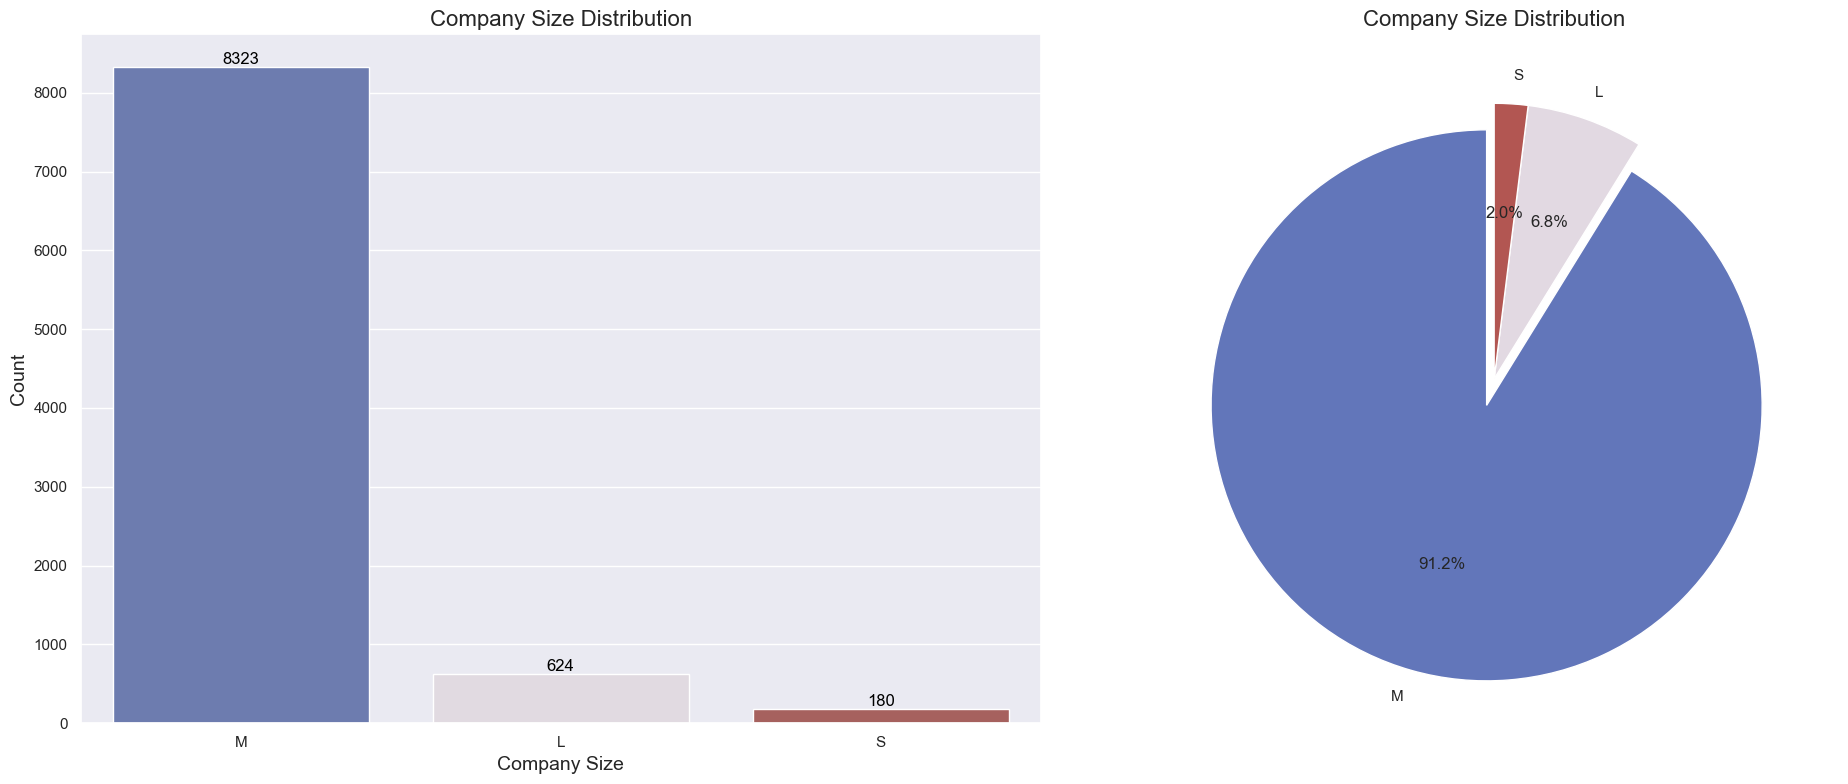

In [26]:
company_size_counts = data['company_size'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(x=company_size_counts.index, y=company_size_counts.values, palette='twilight_shifted', ax=ax[0])

for index, value in enumerate(company_size_counts.values):
    ax[0].text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12, color='black')

ax[0].set_title('Company Size Distribution', fontsize=16)
ax[0].set_xlabel('Company Size', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

explode = [0.1, 0, 0]  
ax[1].pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', 
          startangle=90, explode=explode, colors=sns.color_palette('twilight_shifted', n_colors=3))

ax[1].set_title('Company Size Distribution', fontsize=16)

plt.tight_layout()
plt.show()

* The data shows that medium-sized companies dominate the distribution, accounting for over 91% of the total, while large and small companies represent 6.8% and 2%, respectively. This suggests that most data science opportunities are concentrated in medium-sized organizations, making them key players in the job market.

[]

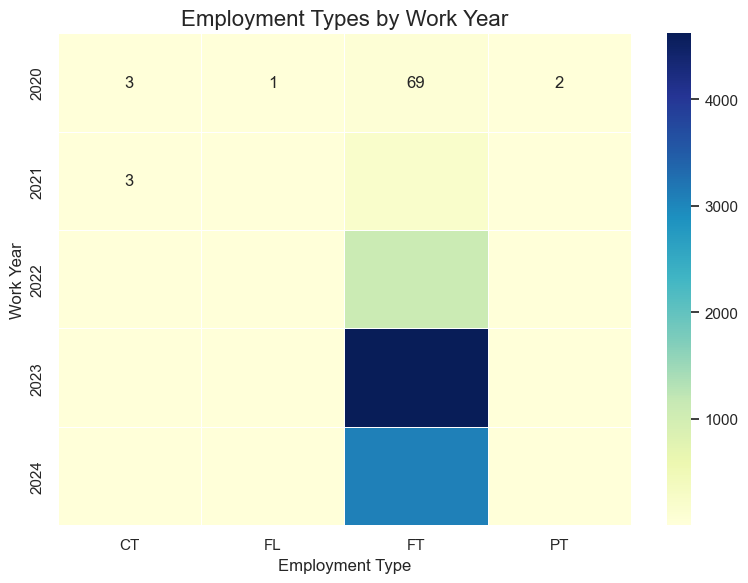

In [27]:
grouped_data = data.groupby(['work_year', 'employment_type']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, fmt='d', cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Employment Types by Work Year', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Work Year', fontsize=12)
plt.tight_layout()
plt.plot()

* The heatmap indicates that full-time (FT) employment dominates across the years, with a noticeable increase in 2023 and 2024. Contract (CT), freelance (FL), and part-time (PT) roles remain minimal throughout the period. This suggests that the data science field strongly favors full-time positions, offering greater job stability in recent years.

<Figure size 1200x600 with 0 Axes>

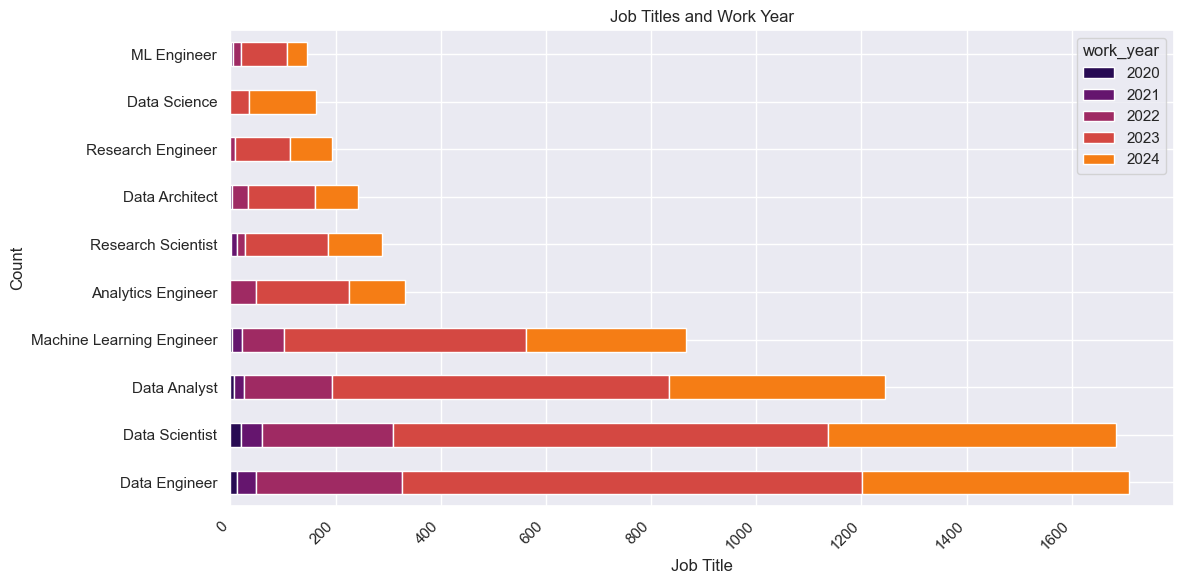

In [28]:
job_year_counts = pd.crosstab(data['job_title'], data['work_year'])

plt.figure(figsize=(12, 6))
job_year_counts.loc[top_job_titles.index].plot(kind='barh', stacked=True, color=sns.color_palette('inferno'), figsize=(12, 6))

plt.title('Job Titles and Work Year')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show();

* The data science job market has seen significant growth from 2020 to 2024, particularly in core roles like Data Engineer, Data Scientist, and Data Analyst. This trend underscores the increasing reliance on data-driven decision-making across industries.

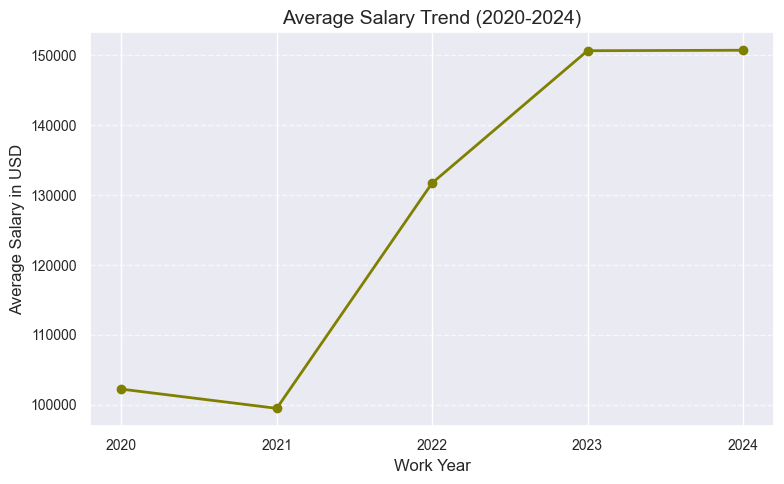

In [29]:
salary_trend = data.groupby('work_year')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(salary_trend['work_year'], salary_trend['salary_in_usd'], marker='o', color='olive', linestyle='-', linewidth=2)

plt.title('Average Salary Trend (2020-2024)', fontsize=14)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(salary_trend['work_year'], fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


The salary trends from 2020 to 2024 reveal significant market dynamics. After a minor decline in 2021, average salaries experienced a sharp upward trajectory until 2023, reflecting strong economic recovery, increasing demand for skilled professionals, and competitive hiring strategies. However, the stabilization in 2024 suggests that salaries have reached a plateau, possibly due to market maturity or economic adjustments.

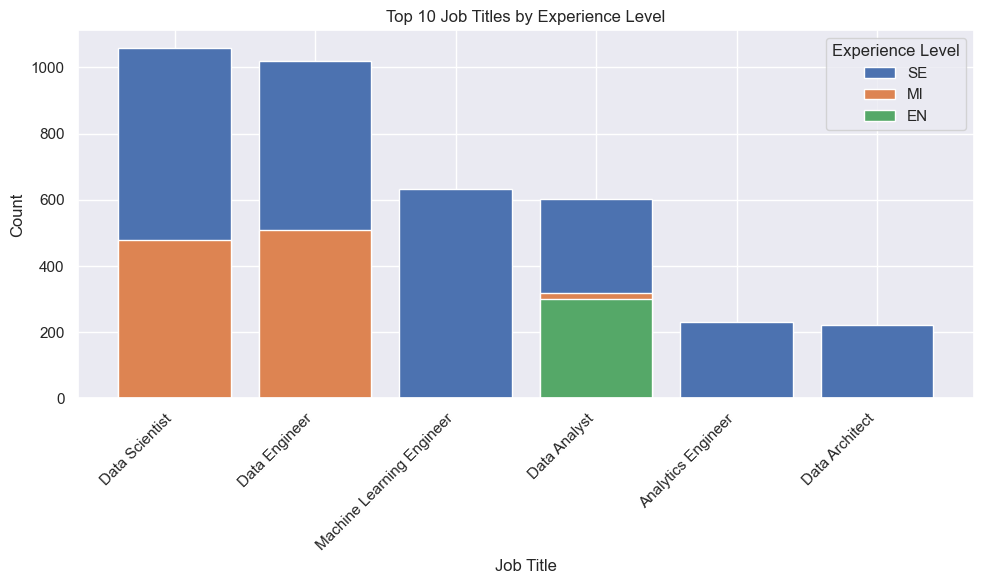

In [30]:
counts = data.groupby(["experience_level", "job_title"]).size().reset_index(name="count")

top_10 = counts.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
for level in top_10['experience_level'].unique():
    subset = top_10[top_10['experience_level'] == level]
    plt.bar(subset['job_title'], subset['count'], label=level)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Job Titles by Experience Level")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

* Companies seem to prioritize hiring more experienced individuals for critical roles like "Data Scientist" and "Data Engineer."
* Entry-level roles like "Data Analyst" are still present but less significant in higher-demand positions.
* There is a clear hierarchy in the dataset where SE and MI levels dominate the dataset for the top job titles.

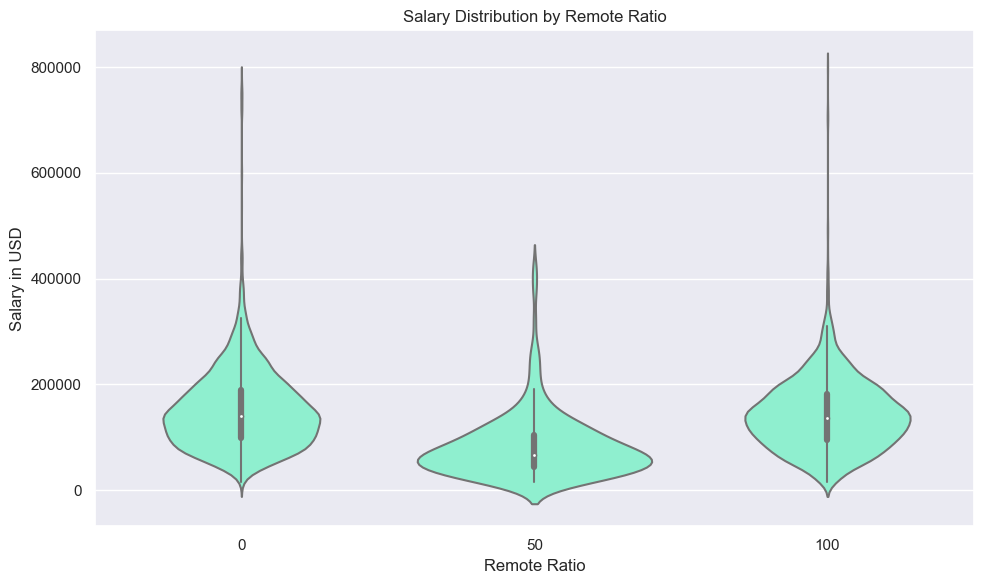

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['remote_ratio'], y=data['salary_in_usd'], split=True, color='aquamarine')

plt.title('Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()


* Salary levels remain competitive across remote work settings. On-site and fully remote roles show broader variability, while hybrid roles tend to cluster within a narrower salary band. Fully remote jobs appear attractive without significant pay penalties.

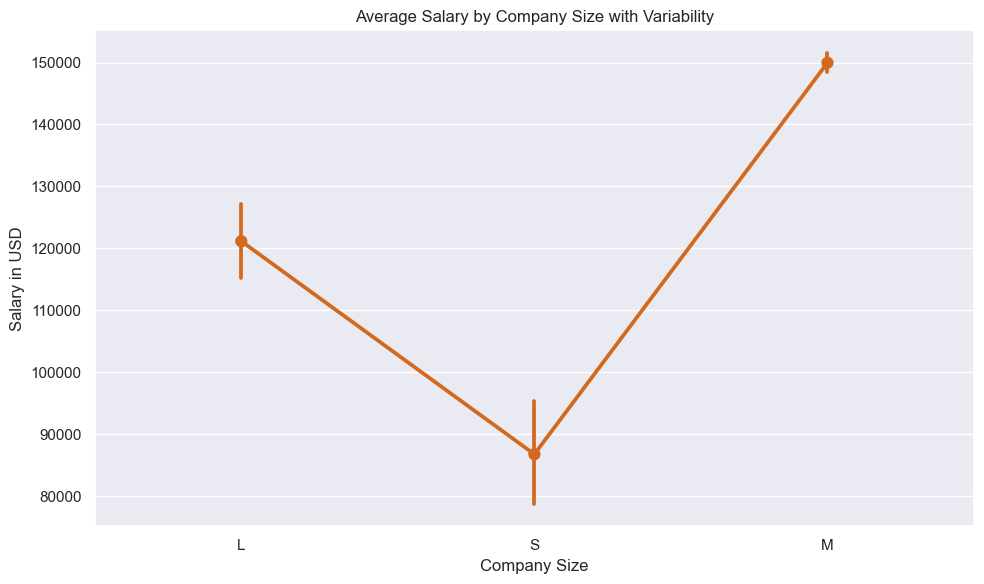

In [32]:
plt.figure(figsize=(10, 6))
sns.pointplot(x=data['company_size'], y=data['salary_in_usd'], color='chocolate')

plt.title('Average Salary by Company Size with Variability')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

* Medium-sized companies appear to offer the most competitive salaries, followed by large companies. Small companies lag behind in average compensation. This might reflect differences in resources, funding, and prioritization of salary structures.

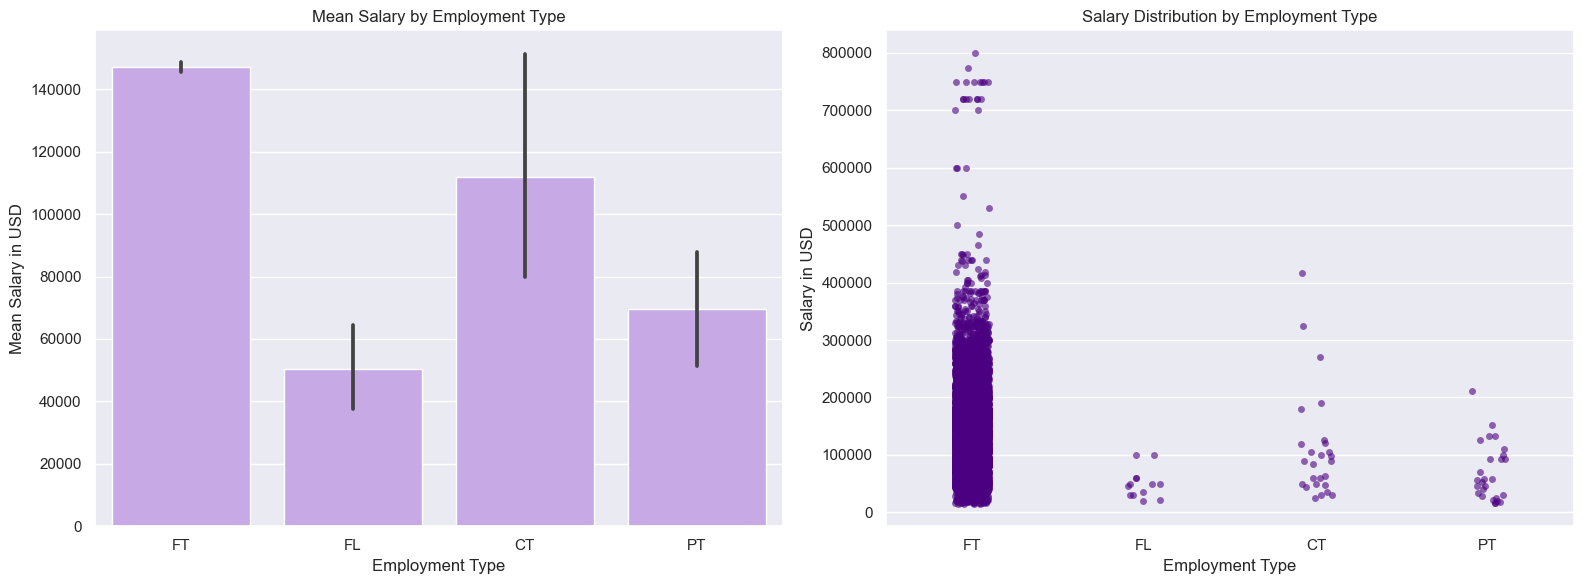

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

sns.barplot(ax=axes[0], x=data['employment_type'], y=data['salary_in_usd'], estimator='mean', color='xkcd:lavender')
axes[0].set_title('Mean Salary by Employment Type')
axes[0].set_xlabel('Employment Type')
axes[0].set_ylabel('Mean Salary in USD')

sns.stripplot(ax=axes[1], x=data['employment_type'], y=data['salary_in_usd'], jitter=True, alpha=0.6, color='indigo')
axes[1].set_title('Salary Distribution by Employment Type')
axes[1].set_xlabel('Employment Type')
axes[1].set_ylabel('Salary in USD')

plt.tight_layout()
plt.show()

* Full-time roles offer the highest and most stable salaries, while freelance, contract, and part-time roles have lower average salaries with more variability, especially in contract positions.

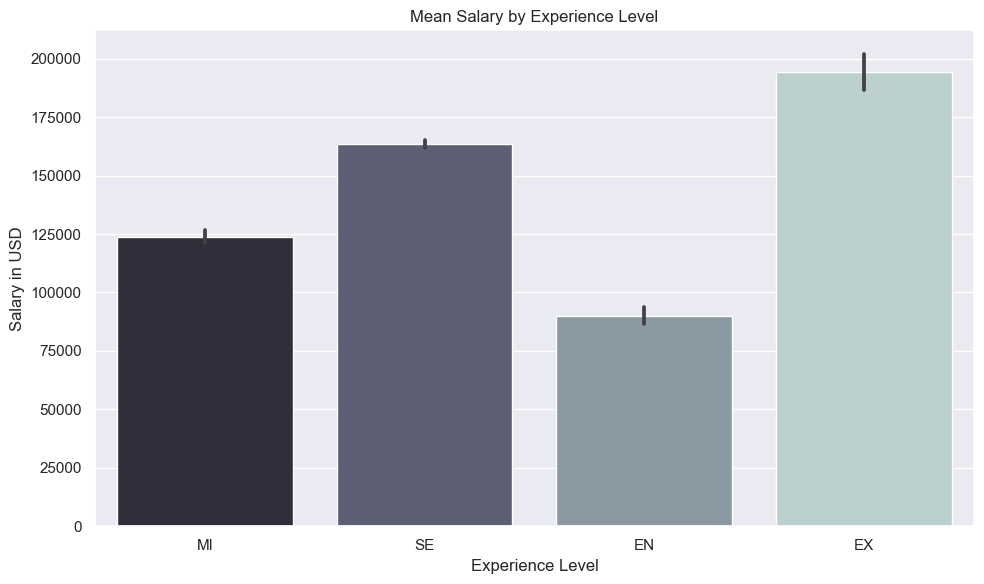

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['experience_level'], y=data['salary_in_usd'], estimator='mean', palette='bone')

plt.title('Mean Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

* The mean salary increases with experience level, with <b>Entry-level (EN)</b> roles earning the least, followed by <b>Mid-level (MI)</b> and <b>Senior-level (SE)</b> positions. <b>Executive-level (EX)</b> roles have the highest average salary, reflecting the value of experience and leadership in data science careers.

<Figure size 1000x600 with 0 Axes>

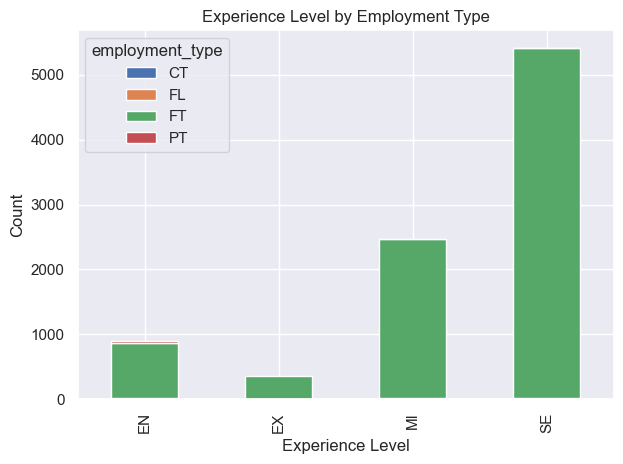

In [35]:
plt.figure(figsize=(10, 6))
experience_employment_type = pd.crosstab(data['experience_level'], data['employment_type'])
experience_employment_type.plot(kind='bar', stacked=True)

plt.title('Experience Level by Employment Type')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

* This  shows that Full-time (FT) employment dominates across all experience levels, especially at the Senior (SE) and Mid-level (MI) positions. Other employment types, such as Contract (CT), Freelance (FL), and Part-time (PT), are much less common in all categories. This indicates a strong preference for full-time roles in data science careers.

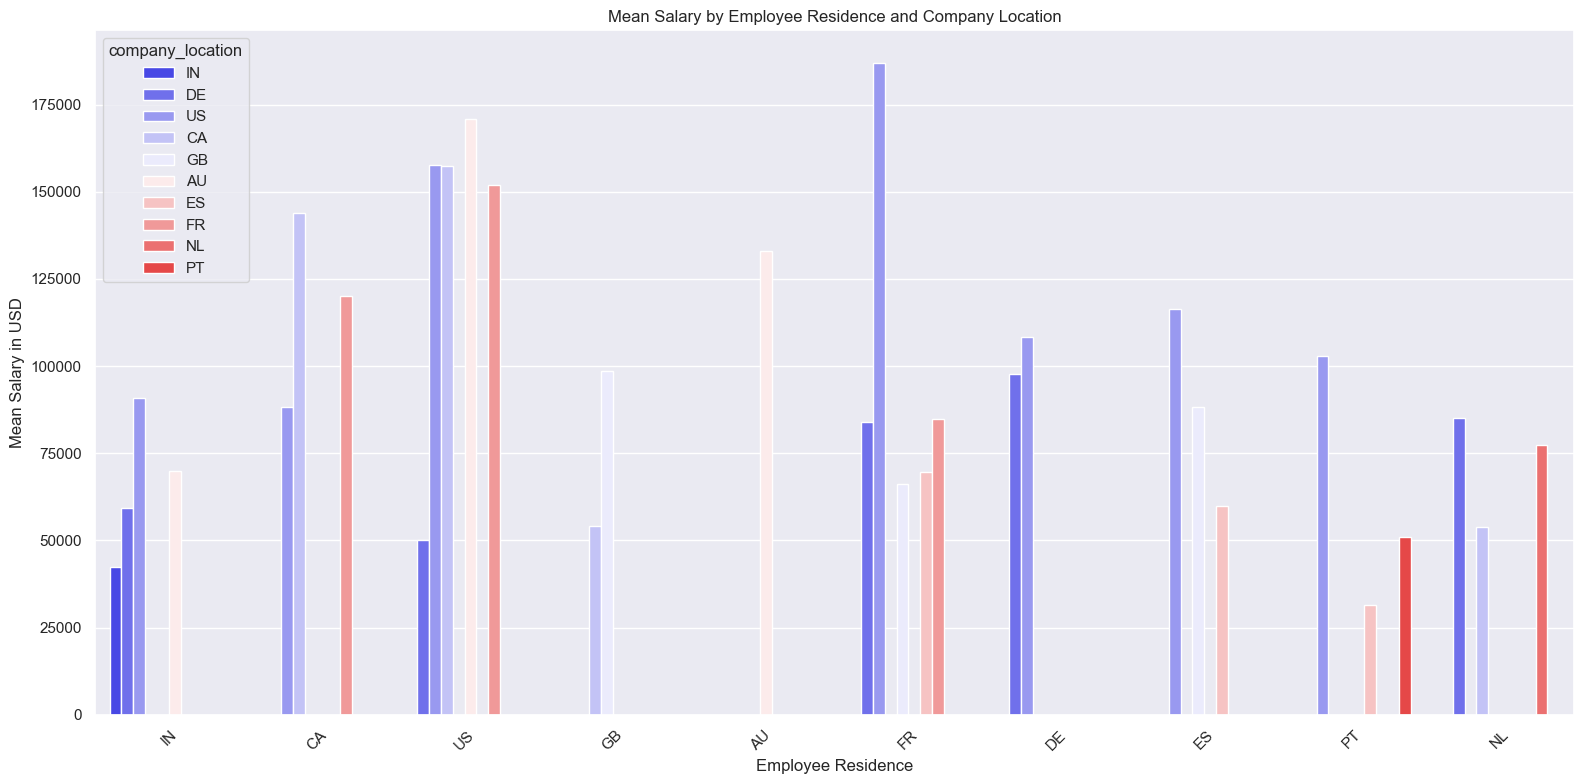

In [36]:
filtered_data = data[
    (data['employee_residence'].isin(top_residences.index)) &
    (data['company_location'].isin(top_locations.index))
]

plt.figure(figsize=(16, 8))
sns.barplot(
    x='employee_residence',
    y='salary_in_usd',
    hue='company_location',
    data=filtered_data,
    estimator='mean',
    ci=None,        
    dodge=True,      
    width=0.8,
    palette='bwr'
)
plt.xticks(rotation=45)  
plt.title('Mean Salary by Employee Residence and Company Location')
plt.xlabel('Employee Residence')
plt.ylabel('Mean Salary in USD')
plt.tight_layout() 
plt.show()

* This highlights the mean salaries across different combinations of employee residence and company location:

1. United States (US) consistently offers the highest mean salaries, regardless of employee residence.
2. Employees residing in India (IN) tend to have lower mean salaries compared to others, even when working for companies in high-paying regions like the US or Canada.
3. European countries like Germany (DE), France (FR), and Netherlands (NL) show competitive salaries for employees residing within Europe but generally fall below US-based salaries.
4. Companies in Portugal (PT) and Spain (ES) offer lower mean salaries compared to other European and North American regions.
   
This chart emphasizes the significant influence of both employee residence and company location on mean salaries.

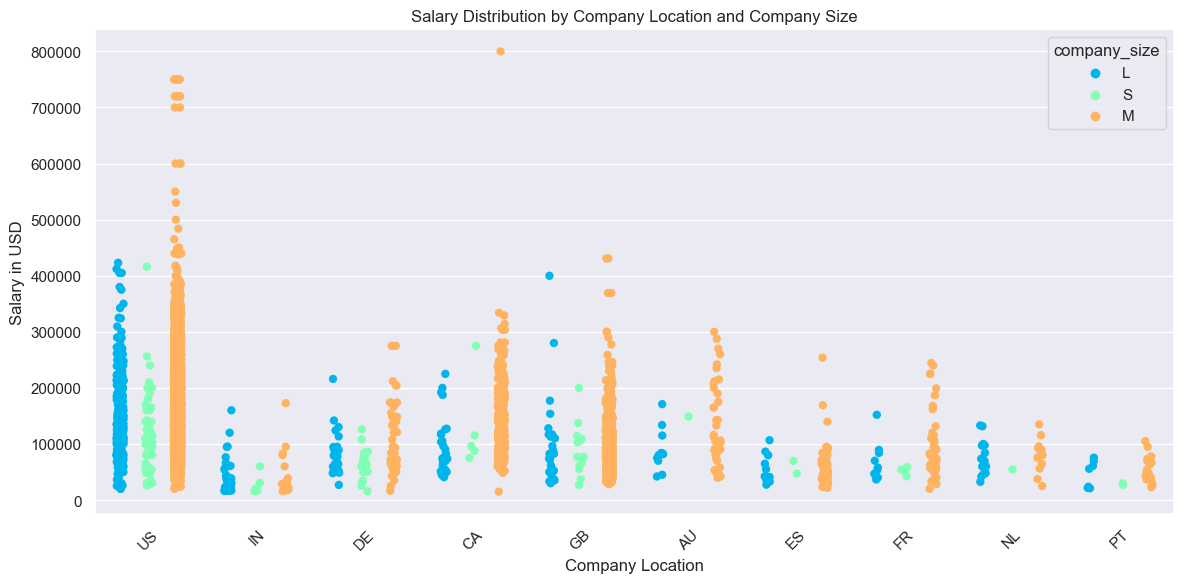

In [37]:
filtered_data = data[data['company_location'].isin(top_locations.index)]

plt.figure(figsize=(12, 6))
sns.stripplot(
    x='company_location',
    y='salary_in_usd',
    hue='company_size',
    data=filtered_data,
    jitter=True,          
    dodge=True,          
    palette='rainbow',       
    marker='o',           
    size=6                
)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Company Location and Company Size')
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()


* The salary distribution indicates that the United States offers the highest salaries, particularly in medium-sized companies. Other locations, such as India, Germany, and Canada, have lower overall salary ranges, with medium-sized companies generally paying more than small or large companies. This emphasizes the prominence of location and company size as key factors influencing salary levels in data science roles.

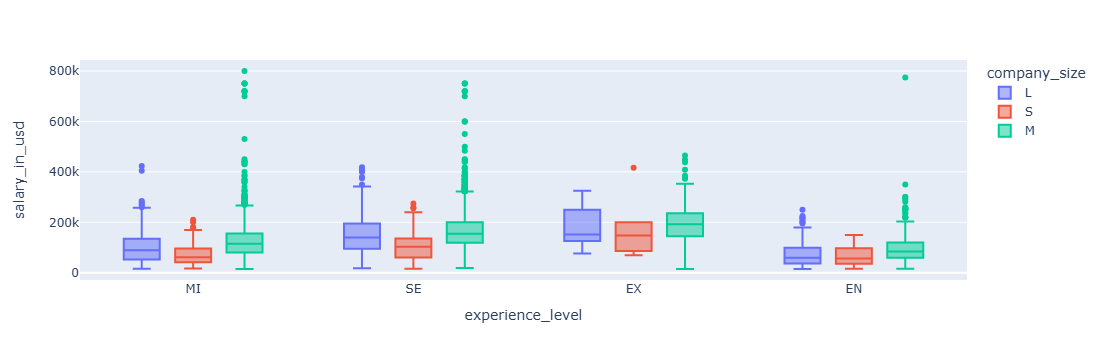

In [38]:
import plotly.express as px
fig = px.box(data, x='experience_level', y='salary_in_usd', color='company_size')
fig.show()

1. Experience Level Impact:

* Salaries increase with experience level, peaking at "Executive (EX)" and "Expert (EN)" levels.
* Entry-level (MI) and mid-level (SE) employees earn lower salaries compared to senior roles.
  
2. Company Size Influence:

* Medium-sized companies (M) consistently pay the highest across all experience levels.
* Small companies (S) offer lower salaries, especially at junior levels.
* Large companies (L) fall in between but show more consistency and fewer outliers.

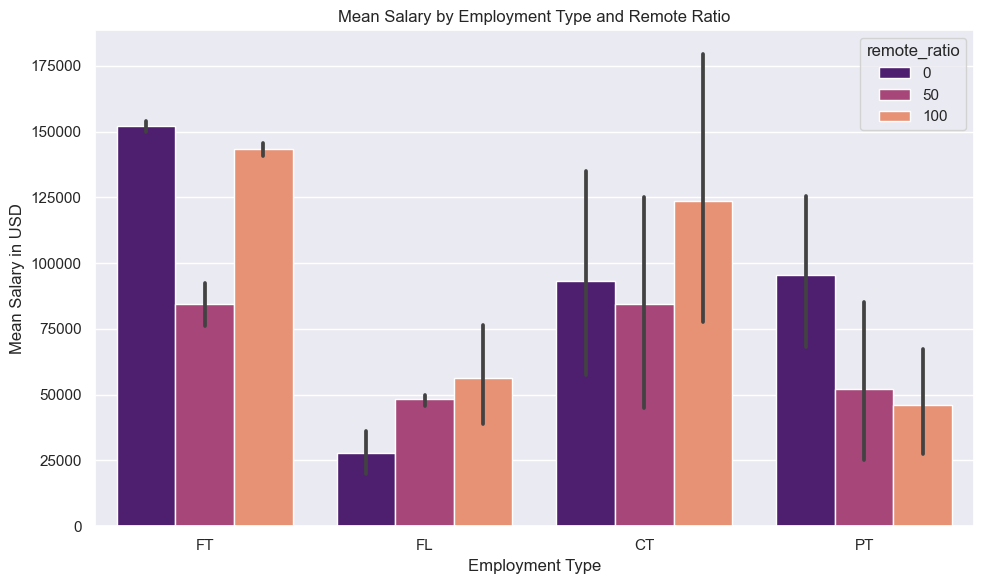

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['employment_type'], y=data['salary_in_usd'], hue=data['remote_ratio'], palette='magma')

plt.title('Mean Salary by Employment Type and Remote Ratio')
plt.xlabel('Employment Type')
plt.ylabel('Mean Salary in USD')
plt.tight_layout()
plt.show()

* Higher salaries are seen in <b>full-time</b> and <b>contractual</b> roles, with <b>on-site (0%)</b> and <b>fully remote (100%)</b> work offering competitive pay. <b>Freelancers</b> and <b>part-time</b> roles generally earn less across all remote ratios. Remote work impact varies by employment type, favoring full-time and contractual employees.

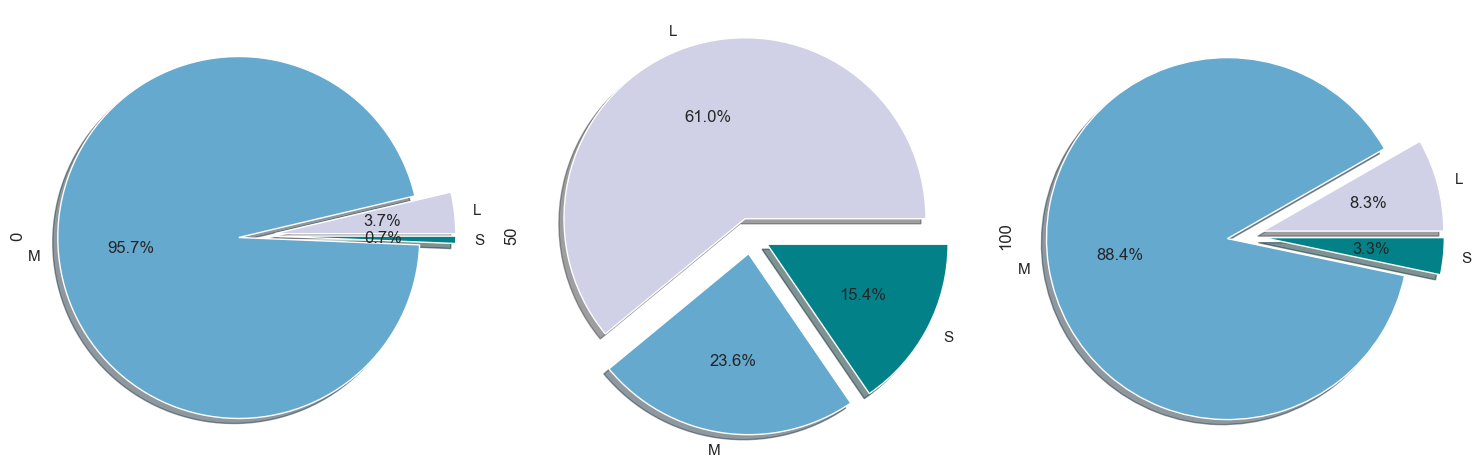

In [40]:
company_size_remote = pd.crosstab(data['company_size'], data['remote_ratio'])
colors = sns.color_palette('PuBuGn', company_size_remote.shape[1])
company_size_remote.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%', legend=False, shadow=True, explode=[0.1]*company_size_remote.shape[1], colors=colors)
plt.tight_layout()
plt.show()

1. First Pie Chart:
A dominant percentage (95.7%) belongs to one category (likely 'O'), while the other categories ('M', 'L', 'S') contribute minimally.

2. Second Pie Chart:
The largest share (61%) belongs to category 'L', followed by 'M' (23.6%), and a smaller proportion for 'S' (15.4%).

3. Third Pie Chart:
A significant majority (88.4%) is attributed to category 'M', with 'L' (8.3%) and 'S' (3.3%) having minor contributions.

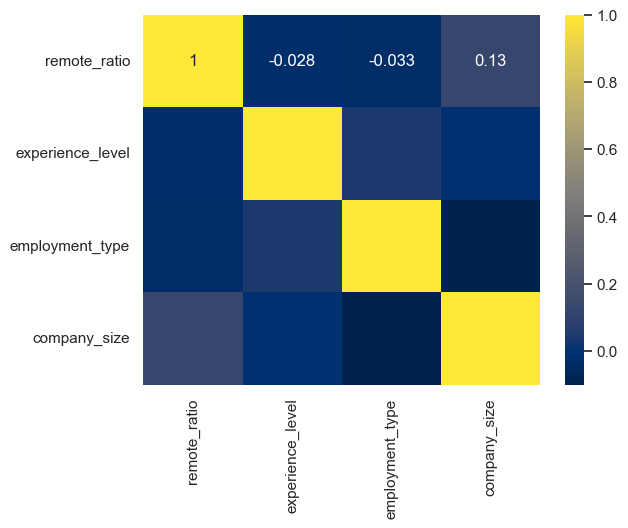

In [41]:
corr_matrix = data[['remote_ratio', 'experience_level', 'employment_type', 'company_size']].apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis')
plt.show()

The heatmap shows weak or no strong correlations between the variables (remote_ratio, experience_level, employment_type, and company_size). This indicates that these factors are relatively independent of one another in the dataset.

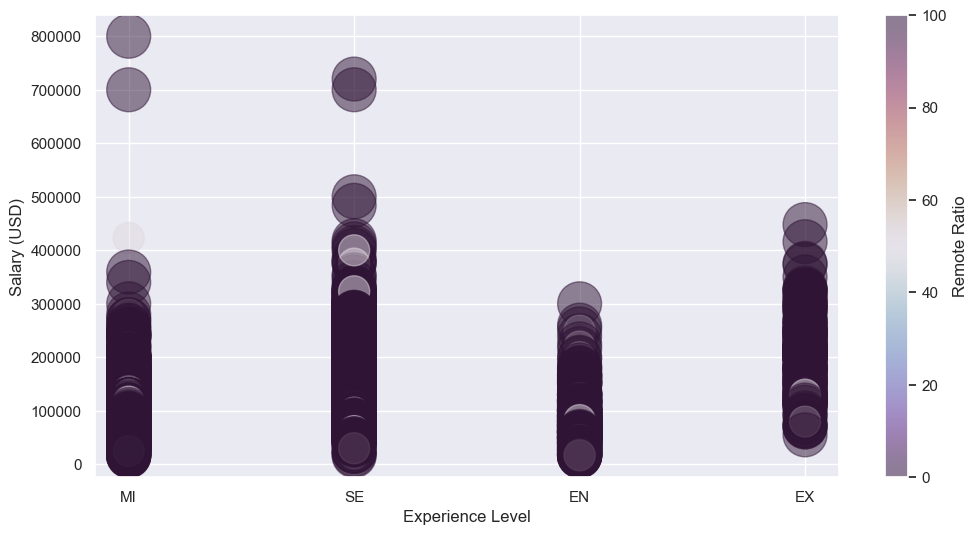

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(data['experience_level'], data['salary_in_usd'], 
            s=data['remote_ratio']*10, alpha=0.5, 
            c=data['remote_ratio'], cmap='twilight_shifted')

plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.colorbar(label='Remote Ratio') 
plt.show()

This visualizes salaries (in USD) across different experience levels (MI: Mid-level, SE: Senior-level, EN: Entry-level, EX: Executive-level) with the bubble size representing the remote ratio. Key observations include:

* Senior-level (SE) and Executive-level (EX) roles tend to show higher salaries, while Entry-level (EN) roles generally have lower salaries.
* The remote ratio does not have a clear linear relationship with salary, indicating its potential independence from experience level.

# **Key Insights and Analysis**




#### **Objective 1: Analyze Salary Trends in Data Science Roles**

1. **Growth Patterns**:
   - The data science job market experienced rapid growth from 2020 to 2023, with 2023 accounting for the majority of opportunities. This suggests heightened demand for data professionals during this period.
   - A decline in 2024 could indicate market stabilization, economic adjustments, or incomplete data for the year.

2. **Salary Trends**:
   - Salaries rose steadily from 2021 to 2023, with a sharp increase during this period, reflecting recovery and competitiveness.
   - The plateau in 2024 signals market maturity, with salaries stabilizing despite increased competition.

---

#### **Objective 2: Identify Key Factors Influencing Salaries**

1. **Experience Level**:
   - Senior-level (SE) and Executive-level (EX) roles command the highest salaries, underscoring the importance of experience and leadership.
   - Entry-level roles (EN) offer lower compensation but provide opportunities for newcomers to enter the field.

2. **Job Roles**:
   - Core roles like Data Engineer, Data Scientist, and Data Analyst dominate the job market, while emerging roles like Machine Learning Engineer indicate a shift towards AI-driven solutions.
   - Companies prioritize experienced hires for critical roles, leaving fewer opportunities for entry-level professionals.

3. **Employment Type**:
   - Full-time (FT) positions dominate, offering the most stable and competitive salaries. Contract, freelance, and part-time roles are limited and offer lower average pay with higher variability.

4. **Remote Work**:
   - Salaries are competitive across remote settings, with fully remote and on-site roles offering broader pay ranges. Hybrid roles show tighter salary distributions.

5. **Geographical Influence**:
   - The US leads in offering the highest salaries, followed by Great Britain and Canada. European regions like Germany and the Netherlands offer competitive salaries but remain below US levels.
   - Salaries are influenced significantly by both employee residence and company location. Employees in India earn less even when working for high-paying regions.

6. **Company Size**:
   - Medium-sized companies consistently offer the highest salaries across all experience levels, possibly due to optimal resource allocation.
   - Large companies provide stable salaries with fewer outliers, while small companies lag behind, especially for entry-level roles.

---

#### **Objective 3: Provide Actionable Insights**

1. **For Job Seekers**:
   - Focus on acquiring skills relevant to high-demand roles such as Data Engineer and Machine Learning Engineer.
   - Target opportunities in medium-sized companies and regions like the US, Great Britain, and Canada for competitive salaries.
   - Invest in career progression to move into senior and executive roles for higher earning potential.

2. **For Employers**:
   - Offer competitive salaries and remote work options to attract top talent, particularly for high-demand roles and senior positions.
   - Focus on hiring experienced professionals for critical roles, while creating structured entry-level programs to build a pipeline of future talent.

3. **For Educators**:
   - Align curricula with industry needs, emphasizing skills required for high-demand roles in data engineering and machine learning.
   - Highlight the importance of soft skills and leadership to help graduates transition into senior-level positions.
   - Educate students about regional and global trends to help them make informed career choices.

---

### **Additional Observations**

1. **Role and Salary Distribution**:
   - Senior-level roles dominate, reflecting a preference for expertise in data science careers.
   - Entry-level roles are fewer, indicating that aspirants need strong foundational skills to secure jobs.

2. **Workplace Trends**:
   - On-site roles remain predominant, though remote opportunities have grown significantly, aligning with broader industry trends post-2020.

3. **Market Dynamics**:
   - Salary variations across roles, regions, and experience levels reflect the interplay of supply, demand, and economic conditions in the data science field.

4. **Independent Factors**:
   - Correlations between variables like remote ratio, experience level, and employment type are weak, suggesting that these factors independently influence salaries and hiring trends.

This analysis provides a comprehensive understanding of the evolving landscape of data science roles and salaries, empowering stakeholders to make strategic decisions.